<a href="https://colab.research.google.com/github/KimJunGu9/ADP_ML/blob/main/6_2_%EC%98%A4%EB%B2%84_%EC%83%98%ED%94%8C%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 오버 샘플링

# 소수 클래스의 샘플을 증가시켜 마이너 클래스와 메이저 클래스의 샘플 크기를 동일하게 만드는 기법
# 랜덤 오버샘플링(소수 샘플 복제)은 동일한 정보를 복사하여 오버피팅을 유발할 수 있음

In [2]:
# SMOTE(Synthetic Minority Over-sampling Technique)

# 소수 클래스의 기존 샘플을 사용하여 새로운 합성 관찰을 생성 하는 오버 샘플링 기법 소수 클래스에 대한 선형 보간법으로 가상 훈련 기록을 생성.
# 합성 훈련 기록은 소수 클래스의 각 예에 대해 k-최근접 이웃 중 하나 이상을 무작위로 선택하여 생성.
# 오버샘플링 과정을 거친 후 데이터를 재구성하고 처리된 데이터에 대해 여러 분류 모델을 적용할 수 있음
# 데이터의 특성에 따라 다르겠지만, 빅데이터 분석을 위해서는 많은 데이터 확보가 효과적이므로 오버샘플링 기법을 적용하는 것이 좋음.
# 기존의 데이터가 적은 새로운 사례의 데이터에서 사용하기 어려움.

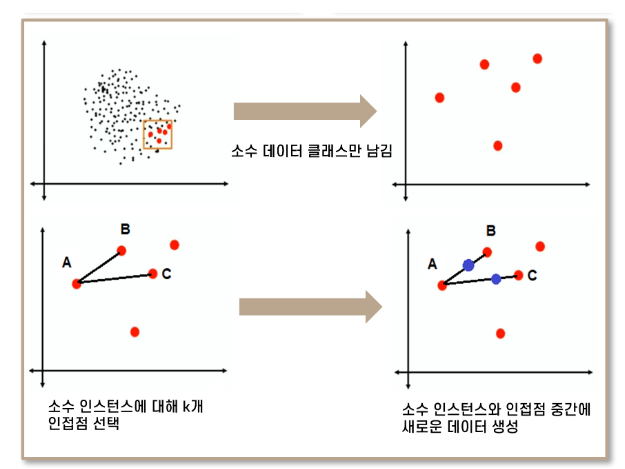

In [3]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
credit = pd.read_csv('/content/drive/MyDrive/ADP/Part.2/1. 통계분석/data/data/credit_final.csv')

In [6]:
X = credit.drop(['credit.rating'],axis=1)
y = credit['credit.rating']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=1004)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [9]:
X_train.shape

(700, 20)

In [10]:
y_train.value_counts()

1    490
0    210
Name: credit.rating, dtype: int64

In [11]:
from imblearn.over_sampling import SMOTE
# 모델설정
sm = SMOTE( k_neighbors=5)

# train데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)

In [12]:
print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled.shape))

After OverSampling, the shape of train_X: (980, 20)
After OverSampling, the shape of train_y: (980,) 



In [13]:
print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))

After OverSampling, counts of label '1': 490
After OverSampling, counts of label '0': 490


In [14]:
from sklearn.svm import SVC

svc1 = SVC(C = 20.00, gamma=0.1, probability=True)
svc1.fit(X_train, y_train)

svc2 = SVC(C = 20.00, gamma=0.1, probability=True)
svc2.fit(X_resampled, y_resampled)

SVC(C=20.0, gamma=0.1, probability=True)

In [15]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc1, X_test, y_test)

ImportError: ignored

In [16]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc2, X_test, y_test)

ImportError: ignored